# GemGIS Vector Data
This notebooks presents the different functions of GemGIS that are available for Vector Data.

**What is Vector Data?**

Vector data provide a way to represent real world features within the GIS environment. A feature is anything you can see on the landscape. Imagine you are standing on the top of a hill. Looking down you can see houses, roads, trees, rivers, and so on. Each one of these things would be a feature when we represent them in a GIS Application. Vector features have attributes, which consist of text or numerical information that describe the features.

**Point Data**
The first thing we need to realise when talking about point features is that what we describe as a point in GIS is a matter of opinion, and often dependent on scale. Let us look at cities for example. If you have a small scale map (which covers a large area), it may make sense to represent a city using a point feature. However as you zoom in to the map, moving towards a larger scale, it makes more sense to show the city limits as a polygon.

When you choose to use points to represent a feature is mostly a matter of scale (how far away are you from the feature), convenience (it takes less time and effort to create point features than polygon features), and the type of feature (some things like telephone poles just do not make sense to be stored as polygons).

A point feature has an X, Y and optionally, Z value. The X and Y values will depend on the Coordinate Reference System (CRS) being used. For now let us simply say that a CRS is a way to accurately describe where a particular place is on the earth’s surface. One of the most common reference systems is Longitude and Latitude. Lines of Longitude run from the North Pole to the South Pole. Lines of Latitude run from the East to West. You can describe precisely where you are at any place on the earth by giving someone your Longitude (X) and Latitude (Y). If you make a similar measurement for a tree or a telephone pole and marked it on a map, you will have created a point feature.

Since we know the earth is not flat, it is often useful to add a Z value to a point feature. This describes how high above sea level you are.

<img src="data/images/point_feature.png" width=250>

**Polyline Data**
Where a point feature is a single vertex, a polyline has two or more vertices. The polyline is a continuous path drawn through each vertex. When two vertices are joined, a line is created. When more than two are joined, they form a ‘line of lines’, or polyline.

A polyline is used to show the geometry of linear features such as roads, rivers, contours, footpaths, flight paths and so on. Sometimes we have special rules for polylines in addition to their basic geometry. For example contour lines may touch (e.g. at a cliff face) but should never cross over each other. Similarly, polylines used to store a road network should be connected at intersections. In some GIS applications you can set these special rules for a feature type (e.g. roads) and the GIS will ensure that these polylines always comply to these rules.

If a curved polyline has very large distances between vertices, it may appear angular or jagged, depending on the scale at which it is viewed. Because of this it is important that polylines are digitised (captured into the computer) with distances between vertices that are small enough for the scale at which you want to use the data.

<img src="data/images/polyline_feature.png" width=250>

**Polygons**
Polygon features are enclosed areas like dams, islands, country boundaries and so on. Like polyline features, polygons are created from a series of vertices that are connected with a continuous line. However, because a polygon always describes an enclosed area, the first and last vertices should always be at the same place! Polygons often have shared geometry –– boundaries that are in common with a neighbouring polygon. Many GIS applications have the capability to ensure that the boundaries of neighbouring polygons exactly coincide. 

As with points and polylines, polygons have attributes. The attributes describe each polygon. For example a dam may have attributes for depth and water quality.

<img src="data/images/polygon_feature.png" width=250>


Source: https://docs.qgis.org/2.8/en/docs/gentle_gis_introduction/vector_data.html

# Importing Libraries

In [1]:
import sys
sys.path.append('../../gemgis')

import gemgis as gg

print(gg)

<module 'gemgis' from '../../gemgis\\gemgis\\__init__.py'>


# Creating Map

In [2]:
m = gg.Map(center = (50.797378, 6.235039), zoom = 11)

# Load Vector Data (Polygon)

## Load Vector Data

In [3]:
vector = gg.data.Vector(path = 'data/vector_data/GeologicalMapAachen.shp')
geomap = vector.load_vector_data()
geomap.head()

OBJECTID SYSTEM2     SERIE2 SSERIE2     STUFE2 SSTUFE2     SYSTEM1  \
0       131   Devon  Oberdevon       -  Famennium       -    Devonian   
1       132       -          -       -          -       -     Neogene   
2       133       -          -       -          -       -     Neogene   
3       134       -          -       -          -       -  Cretaceous   
4       135   Devon  Oberdevon       -  Famennium       -    Devonian   

        SERIE1      SSERIE1     STUFE1  ... SGRUPPE SSYMBOL  \
0    Oberdevon            -   Frasnium  ...       -  dfrs+f   
1      MiozÃ¤n  ObermiozÃ¤n          -  ...       -    mii7   
2      MiozÃ¤n  ObermiozÃ¤n          -  ...       -    mii7   
3   Oberkreide            -  Santonium  ...       -   krsah   
4  Mitteldevon            -   Givetium  ...       -    dgfk   

                        EINHEIT1                                   EINHEIT2  \
0  Frasnes- und Famenne-Schiefer                                          -   
1                Inden-Formation                                          -   
2                Inden-Formation                                          -   
3               Aachen-Formation  Aachen-Formation, Hergenrath-Subformation   
4                     Massenkalk                                          -   

    SSY_GSY         GE_GG                                            GRUTEXT  \
0  dfrs+f,T  4.540300e+10  Tonstein; untergeordnet Kalkmergel- bis Mergel...   
1   mii7,s4  7.000001e+09  Fein- bis Mittelsand; untergeordnet Schluff un...   
2   mii7,s4  7.000001e+09  Fein- bis Mittelsand; untergeordnet Schluff un...   
3  krsah,ut  1.740000e+10  Schluff und Ton; untergeordnet Fein- bis Mitte...   
4   dgfk,KD  4.680000e+10                         Kalkstein und Dolomitstein   

     SHAPE_Leng    SHAPE_Area  \
0    459.117585  1.204331e+04   
1   4409.717252  4.872963e+05   
2   7644.698585  2.347097e+06   
3  19078.933649  2.340703e+06   
4   4615.886827  4.051250e+05   

                                            geometry  
0  POLYGON ((32299083.709 5631034.983, 32299164.0...  
1  POLYGON ((32317556.700 5633860.692, 32317497.2...  
2  POLYGON ((32310428.554 5638385.230, 32310400.4...  
3  POLYGON ((32291096.918 5622295.519, 32290989.7...  
4  POLYGON ((32307344.796 5625848.944, 32307389.6...  

[5 rows x 22 columns]

In [4]:
type(geomap)

geopandas.geodataframe.GeoDataFrame

In [5]:
geomap.crs

{'init': 'epsg:4647'}

## Define Colors and create Color dictionoray

In [6]:
cols =[ ('#cb8c37'),('#f2f91d'), ('#7fc64e'), ('#67a599'),('#f2f91d'),('#812b92'), ('#7fa056'), ('#009270')]

In [7]:
column = 'SYSTEM1'
geomap[column].unique()

array(['Devonian', 'Neogene', 'Cretaceous', 'Carboniferous', 'Paleogene',
       'Triassic', 'Cambrian', 'Ordovician'], dtype=object)

In [8]:
color_dict = dict(zip(geomap[column].unique(), cols))
color_dict

{'Devonian': '#cb8c37',
 'Neogene': '#f2f91d',
 'Cretaceous': '#7fc64e',
 'Carboniferous': '#67a599',
 'Paleogene': '#f2f91d',
 'Triassic': '#812b92',
 'Cambrian': '#7fa056',
 'Ordovician': '#009270'}

## Load Vector Layer in Map

In [9]:
geological_map = m.load_vector_data(path='data/vector_data/GeologicalMapAachen.shp', name = 'Geological Map', column = 'SYSTEM1', color_dict = color_dict)

In [10]:
m.add_layer(geological_map)

In [11]:
m

Map(center=[50.797378, 6.235039], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', …

# Vector Data Editing

## Plot Vector Data with Geopandas

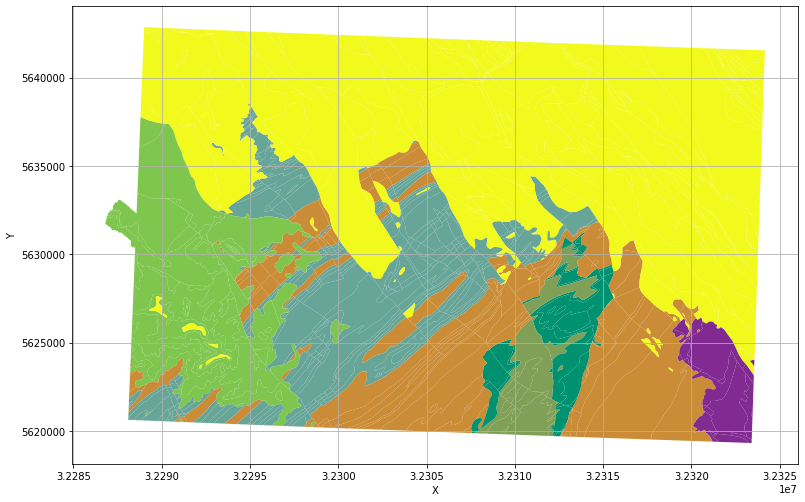

In [12]:
cols =[ ('#7fa056'),  ('#67a599'),('#7fc64e'), ('#cb8c37'), ('#f2f91d'), ('#009270'), ('#f2f91d'),('#812b92')]
vector.plot_vector_data(geomap, column = column, cmap = cols)


## Extract Vertices

In [13]:
geomap.geometry

0      POLYGON ((32299083.709 5631034.983, 32299164.0...
1      POLYGON ((32317556.700 5633860.692, 32317497.2...
2      POLYGON ((32310428.554 5638385.230, 32310400.4...
3      POLYGON ((32291096.918 5622295.519, 32290989.7...
4      POLYGON ((32307344.796 5625848.944, 32307389.6...
                             ...                        
843    POLYGON ((32314538.180 5638775.131, 32314416.1...
844    POLYGON ((32317333.245 5635406.896, 32317438.2...
845    POLYGON ((32324061.121 5638720.353, 32324059.8...
846    POLYGON ((32292646.291 5642529.199, 32292618.6...
847    POLYGON ((32301705.663 5641428.471, 32301704.8...
Name: geometry, Length: 848, dtype: geometry

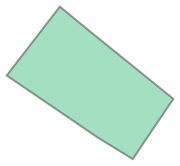

In [14]:
geomap.geometry[0]

<div class="alert alert-block alert-warning">
<b>Issue:</b> Is there a way to plot the points without a loop like below and how can we preserve the attributes? Alternatively, we could just load a point shape file containing the data.
</div>

In [15]:
import shapely
coords = [list(geomap.geometry.exterior[row_id].coords) for row_id in range(geomap.shape[0])]
coords

[[(32299083.70919895, 5631034.98260157),
  (32299164.005298954, 5630970.06570157),
  (32299123.22539895, 5630909.550101571),
  (32299088.346098952, 5630931.022001569),
  (32298996.61839895, 5630993.45760157),
  (32299050.01269895, 5631062.629901569),
  (32299083.70919895, 5631034.98260157)],
 [(32317556.69979936, 5633860.69240155),
  (32317497.20439936, 5633976.203701552),
  (32317433.177399356, 5634100.513601551),
  (32317423.363599356, 5634119.56730155),
  (32317260.758599356, 5634327.644501552),
  (32317255.722999353, 5634334.088301552),
  (32317130.33999935, 5634494.534701553),
  (32316678.183999345, 5634999.273601556),
  (32316654.40519934, 5635031.258101554),
  (32316450.084799338, 5635306.086301554),
  (32316281.897899337, 5635532.312601556),
  (32316454.14999934, 5635533.136701556),
  (32316547.18399934, 5635533.581901554),
  (32316651.532899342, 5635494.022501556),
  (32316651.918699343, 5635493.751701555),
  (32316811.783399347, 5635381.553701555),
  (32317075.33359935, 56350

In [16]:
geomap_json = geomap.__geo_interface__
geomap_json

{'type': 'FeatureCollection',
 'features': [{'id': '0',
   'type': 'Feature',
   'properties': {'EINHEIT1': 'Frasnes- und Famenne-Schiefer',
    'EINHEIT2': '-',
    'GE_GG': 45403002130.0,
    'GRUPPE': '-',
    'GRUTEXT': 'Tonstein; untergeordnet Kalkmergel- bis Mergelkalkstein und Kalkstein',
    'OBJECTID': 131,
    'SERIE1': 'Oberdevon',
    'SERIE2': 'Oberdevon',
    'SGRUPPE': '-',
    'SHAPE_Area': 12043.3064971,
    'SHAPE_Leng': 459.117585064,
    'SSERIE1': '-',
    'SSERIE2': '-',
    'SSTUFE1': '-',
    'SSTUFE2': '-',
    'SSYMBOL': 'dfrs+f',
    'SSY_GSY': 'dfrs+f,T',
    'STUFE1': 'Frasnium',
    'STUFE2': 'Famennium',
    'SYSTEM1': 'Devonian',
    'SYSTEM2': 'Devon'},
   'geometry': {'type': 'Polygon',
    'coordinates': (((32299083.70919895, 5631034.98260157),
      (32299164.005298954, 5630970.06570157),
      (32299123.22539895, 5630909.550101571),
      (32299088.346098952, 5630931.022001569),
      (32298996.61839895, 5630993.45760157),
      (32299050.01269895, 

32301705.66289902 5641428.470701582


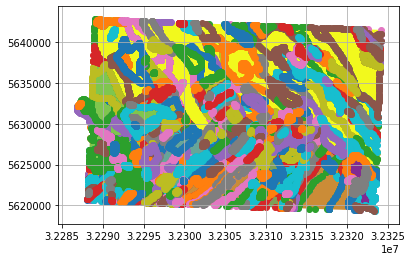

In [17]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

g = [i for i in geomap.geometry]

fig, ax = plt.subplots()
fig.set_figwidth(40)
geomap.plot(ax = ax, column='SYSTEM1', cmap = ListedColormap(cols))
for i in range(len(g)):
    x,y = g[i].exterior.coords.xy
    plt.scatter(x,y)
plt.grid()

plt.gca().set_aspect('equal')
print(x[0],y[0])

## Transform vertices to WGS84 for Map display

In [18]:
from pyproj import Proj
from pyproj import transform
import numpy as np

coords = np.transpose([x,y]).tolist()

proj_custom = Proj(init='EPSG:4647')
proj_deafult = Proj(init='EPSG:4326')


xx,yy= transform(proj_custom, proj_deafult, x,y)

coords = list(zip(yy,xx))
coords

[(50.89043758998623, 6.180473513985124),
 (50.89044724783836, 6.180461867762258),
 (50.891067490328744, 6.179758539295215),
 (50.89145728210726, 6.178933130750728),
 (50.892381383753666, 6.17697618197392),
 (50.89373536576685, 6.175423001157267),
 (50.89480335513286, 6.174197807197002),
 (50.89874927188105, 6.170653104105902),
 (50.89875170429421, 6.174336065634128),
 (50.89875288173332, 6.176185254438908),
 (50.898740953000754, 6.176194593243538),
 (50.898729234285035, 6.176203764292012),
 (50.89799395902437, 6.176505999530437),
 (50.894806486295224, 6.177816095193561),
 (50.894697077307, 6.177861059682021),
 (50.8943069645757, 6.178100402276828),
 (50.89211445573922, 6.17944547642755),
 (50.89169141059412, 6.179704840575702),
 (50.89074819076286, 6.180283100332171),
 (50.89043758998623, 6.180473513985124)]

## Display Vertices as markers on map

In [19]:
from ipyleaflet import Map, Marker

center = (50.779305, 6.078914)

m = Map(center=center, zoom=10)
for i in range(len(coords)):
    marker = Marker(location=coords[i], draggable=True)
    m.add_layer(marker);
m.add_layer(geological_map)
m

Map(center=[50.779305, 6.078914], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', …